In [317]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import numpy as np

In [318]:
df= pd.read_csv("../data/StudentPerformanceFactors-1.csv")

In [319]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [320]:
col_names=df.columns.tolist()

for col in col_names:
    null_count=df[col].isnull().sum()
    print(col,": ",null_count)

Hours_Studied :  0
Attendance :  0
Parental_Involvement :  0
Access_to_Resources :  0
Extracurricular_Activities :  0
Sleep_Hours :  0
Previous_Scores :  0
Motivation_Level :  0
Internet_Access :  0
Tutoring_Sessions :  0
Family_Income :  0
Teacher_Quality :  78
School_Type :  0
Peer_Influence :  0
Physical_Activity :  0
Learning_Disabilities :  0
Parental_Education_Level :  90
Distance_from_Home :  67
Gender :  0
Exam_Score :  0


In [321]:
print("number of rows: ",len(df))

number of rows:  6607


In [322]:
print(df.dtypes)

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object


In [323]:
for col in ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']:
    if df[col].isnull().sum() > 0:
        most_frequent = df[col].mode()[0]
        df[col].fillna(most_frequent, inplace=True)
        print(f"Filled missing values in '{col} with: {most_frequent}")
        


Filled missing values in 'Teacher_Quality with: Medium
Filled missing values in 'Parental_Education_Level with: High School
Filled missing values in 'Distance_from_Home with: Near


/tmp/ipykernel_1507240/1716755617.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


In [324]:
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [325]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [326]:
def score_to_grade(score):
    if pd.isna(score):
        return None
    elif score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

df['Previous_Scores'] = df['Previous_Scores'].apply(score_to_grade)
df['Exam_Score'] = df['Exam_Score'].apply(score_to_grade)

df[['Previous_Scores','Exam_Score']].head()    

,Previous_Scores,Exam_Score
0,C,D
1,F,D
2,A,C
3,A,C
4,D,C


In [327]:
df= pd.read_csv("../data/StudentPerformanceFactors-1.csv")

In [328]:
#label encoding

mapping={
    'Parental_Involvement': {'Low': 1, 'Medium':2, 'High':3},
    'Access_to_Resources':{'Low': 1, 'Medium':2, 'High':3},
    'Motivation_Level':{'Low': 1, 'Medium':2, 'High':3},
    'Family_Income':{'Low': 1, 'Medium':2, 'High':3},
    'Teacher_Quality': {'Low': 1, 'Medium': 2, 'High': 3},
    'Distance_from_Home': {'Near': 1, 'Moderate': 2, 'Far': 3},
    'Parental_Education_Level': {'High School': 1, 'College': 2, 'Postgraduate': 3},
    'Peer_Influence': {'Negative': 1, 'Neutral': 2, 'Positive': 3}
}

for col,mapping in mapping.items():
    df[f'{col}_label'] = df[col]   # saving the original col for plotting purposes
    df[col]=df[col].map(mapping)
    

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Gender,Exam_Score,Parental_Involvement_label,Access_to_Resources_label,Motivation_Level_label,Family_Income_label,Teacher_Quality_label,Distance_from_Home_label,Parental_Education_Level_label,Peer_Influence_label
0,23,84,1,3,No,7,73,1,Yes,0,...,Male,67,Low,High,Low,Low,Medium,Near,High School,Positive
1,19,64,1,2,No,8,59,1,Yes,2,...,Female,61,Low,Medium,Low,Medium,Medium,Moderate,College,Negative
2,24,98,2,2,Yes,7,91,2,Yes,2,...,Male,74,Medium,Medium,Medium,Medium,Medium,Near,Postgraduate,Neutral
3,29,89,1,2,Yes,8,98,2,Yes,1,...,Male,71,Low,Medium,Medium,Medium,Medium,Moderate,High School,Negative
4,19,92,2,2,Yes,6,65,2,Yes,3,...,Female,70,Medium,Medium,Medium,Medium,High,Near,College,Neutral


In [329]:
#one hot endcoding
nominal_cols=[
    'Extracurricular_Activities',
    'Internet_Access',
    'Learning_Disabilities',
    'School_Type',
    'Gender'   
]

for col in nominal_cols:
    df[f'{col}_label'] = df[col]  # for plotting purposes,,again

df=pd.get_dummies(df, columns=nominal_cols, drop_first=False)

df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,Learning_Disabilities_No,Learning_Disabilities_Yes,School_Type_Private,School_Type_Public,Gender_Female,Gender_Male
0,23,84,1,3,7,73,1,0,1,2.0,...,True,False,False,True,True,False,False,True,False,True
1,19,64,1,2,8,59,1,2,2,2.0,...,True,False,False,True,True,False,False,True,True,False
2,24,98,2,2,7,91,2,2,2,2.0,...,False,True,False,True,True,False,False,True,False,True
3,29,89,1,2,8,98,2,1,2,2.0,...,False,True,False,True,True,False,False,True,False,True
4,19,92,2,2,6,65,2,3,2,3.0,...,False,True,False,True,True,False,False,True,True,False


In [330]:
def score_to_grade(score):
    if pd.isna(score):
        return None
    elif score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

# df['Previous_Scores'] = df['Previous_Scores'].apply(score_to_grade)
df['Exam_Score'] = df['Exam_Score'].apply(score_to_grade)

# df[['Previous_Scores','Exam_Score']].head()    
df.head()



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_No,Internet_Access_Yes,Learning_Disabilities_No,Learning_Disabilities_Yes,School_Type_Private,School_Type_Public,Gender_Female,Gender_Male
0,23,84,1,3,7,73,1,0,1,2.0,...,True,False,False,True,True,False,False,True,False,True
1,19,64,1,2,8,59,1,2,2,2.0,...,True,False,False,True,True,False,False,True,True,False
2,24,98,2,2,7,91,2,2,2,2.0,...,False,True,False,True,True,False,False,True,False,True
3,29,89,1,2,8,98,2,1,2,2.0,...,False,True,False,True,True,False,False,True,False,True
4,19,92,2,2,6,65,2,3,2,3.0,...,False,True,False,True,True,False,False,True,True,False


In [331]:
# correlation matrix

# df_numeric= df[[col for col in df.columns if not col.endswith('_label')]]
# correlation_matrix = df_numeric.corr()    
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})  
# plt.title('Correlation Matrix')
# plt.show()  

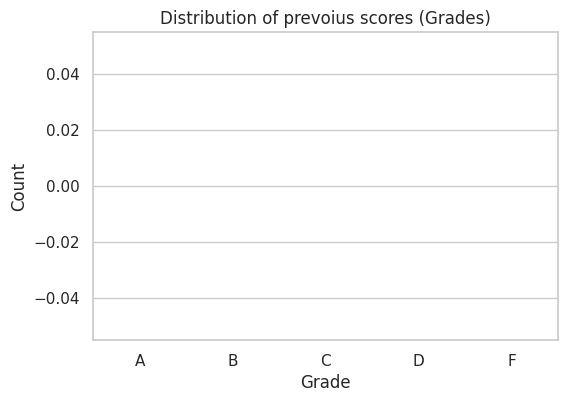

In [332]:
# Histogram of Previous_Scores

sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x = 'Previous_Scores', data=df, order=['A', 'B', 'C', 'D', 'F'])
plt.title("Distribution of prevoius scores (Grades)")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

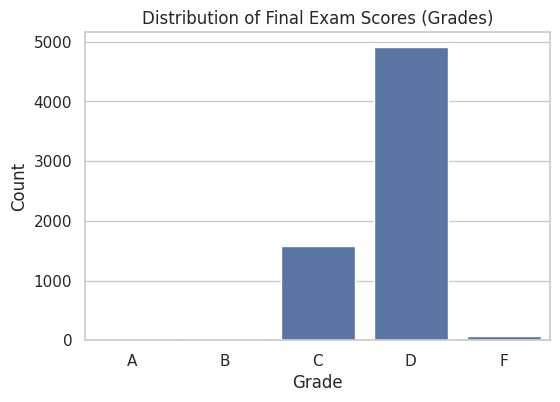

In [333]:
sns.set(style="whitegrid")

plt.figure(figsize=(6,4))
sns.countplot(x = 'Exam_Score', data=df, order=['A', 'B', 'C', 'D', 'F'])
plt.title("Distribution of Final Exam Scores (Grades)")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

In [334]:
cleaned_file = df.copy()

for column in cleaned_file.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = cleaned_file[column].quantile(0.25)
    Q3 = cleaned_file[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5* IQR
    cleaned_file = cleaned_file[(cleaned_file[column] >= lower) & (cleaned_file[column] <= upper)]
    
cleaned_file.to_csv('../data/cleaned_data123.csv', index=False)  #new cleanded file
    


In [335]:
print("Original rows:", df.shape[0])
print("Rows after outlier removal:", cleaned_file.shape[0])
print("Rows removed:", df.shape[0] - cleaned_file.shape[0])

Original rows: 6607
Rows after outlier removal: 5915
Rows removed: 692


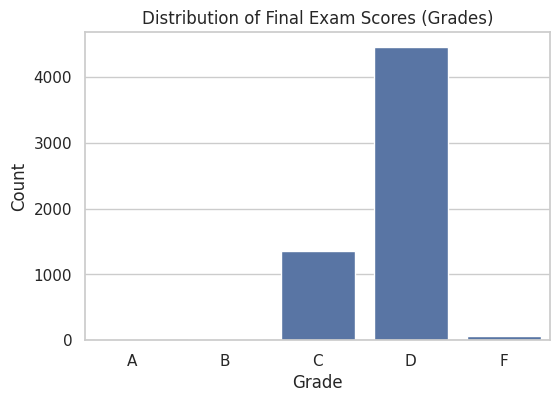

In [336]:
cleaned_df = pd.read_csv("../data/cleaned_data123.csv")
sns.set(style="whitegrid")

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x='Exam_Score', data=cleaned_df, order=['A', 'B', 'C', 'D', 'F'])
plt.title("Distribution of Final Exam Scores (Grades)")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()


In [337]:
print("number of rows: ",len(cleaned_df))

number of rows:  5915


In [338]:
print(df['Exam_Score'].value_counts())             # Before outlier removal
print(cleaned_df['Exam_Score'].value_counts()) 

Exam_Score
D    4914
C    1577
F      68
B      26
A      22
Name: count, dtype: int64
Exam_Score
D    4457
C    1356
F      58
B      25
A      19
Name: count, dtype: int64


In [339]:
col_names=df.columns.tolist()

for col in col_names:
    print(col)

Hours_Studied
Attendance
Parental_Involvement
Access_to_Resources
Sleep_Hours
Previous_Scores
Motivation_Level
Tutoring_Sessions
Family_Income
Teacher_Quality
Peer_Influence
Physical_Activity
Parental_Education_Level
Distance_from_Home
Exam_Score
Parental_Involvement_label
Access_to_Resources_label
Motivation_Level_label
Family_Income_label
Teacher_Quality_label
Distance_from_Home_label
Parental_Education_Level_label
Peer_Influence_label
Extracurricular_Activities_label
Internet_Access_label
Learning_Disabilities_label
School_Type_label
Gender_label
Extracurricular_Activities_No
Extracurricular_Activities_Yes
Internet_Access_No
Internet_Access_Yes
Learning_Disabilities_No
Learning_Disabilities_Yes
School_Type_Private
School_Type_Public
Gender_Female
Gender_Male
